# Import model

In [0]:
import keras
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions
import numpy as np

model = Xception(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

Using TensorFlow backend.
W0727 14:27:03.162845 139622928848768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0727 14:27:03.198028 139622928848768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0727 14:27:03.206085 139622928848768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0727 14:27:03.240673 139622928848768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0727 

91889664/91884032 [==============================] - 3s 0us/step


# Select image

In [0]:
image_url = 'https://photos.wikimapia.org/p/00/00/15/07/40_big.jpg' #@param {type:"string"}

In [0]:
!wget "$image_url"
!mv '40_big.jpg' tum.jpg  
img_path = "tum.jpg"

--2019-07-27 14:27:17--  https://photos.wikimapia.org/p/00/00/15/07/40_big.jpg
Resolving photos.wikimapia.org (photos.wikimapia.org)... 5.9.124.77
Connecting to photos.wikimapia.org (photos.wikimapia.org)|5.9.124.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27883 (27K) [image/jpeg]
Saving to: ‘40_big.jpg’

40_big.jpg          100%[===================>]  27.23K  --.-KB/s    in 0.002s  

2019-07-27 14:27:18 (11.6 MB/s) - ‘40_big.jpg’ saved [27883/27883]



In [0]:
img_path = "tum.jpg"
img = image.load_img(img_path, target_size=(299, 299))
x1 = image.img_to_array(img)
x2 = np.expand_dims(x1, axis=0)
x = preprocess_input(x2)

In [0]:
import matplotlib.pyplot as plt

#plt.imshow(img)
img.save('tum_refactor.png')

# Predict

In [0]:
pred = model.predict(x)

In [0]:
label = decode_predictions(pred)
label

40960/35363 [==================================] - 0s 0us/step


[[('n04005630', 'prison', 0.75126535),
  ('n03661043', 'library', 0.067646615),
  ('n02747177', 'ashcan', 0.013218141),
  ('n03877845', 'palace', 0.011973359),
  ('n03355925', 'flagpole', 0.00813999)]]

# Foolbox

     |████████████████████████████████| 245kB 4.7MB/s 
     |████████████████████████████████| 460kB 50.9MB/s 
     |████████████████████████████████| 409kB 49.2MB/s 
     |████████████████████████████████| 71kB 29.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/d7/e7/c8/153284a6e5e5c3fd4da42a8453175b45e2e185e8b5a09ced06
  Stored in directory: /root/.cache/pip/wheels/d1/7e/c5/1093bc36622d7d06ed6520a50280771ebff8c190d92bd402b6
  Stored in directory: /root/.cache/pip/wheels/d6/a5/09/cb584a95ad332da2bf0265a8b0423c562a99553a3edf148d12
Successfully built foolbox gitdb smmap
Regular Image Prediction:
[('n04005630', 'prison', 0.75126535), ('n03661043', 'library', 0.067646615), ('n02747177', 'ashcan', 0.013218141)]
Adversarial Image Prediction:
[('n01930112', 'nematode', 0.05350936), ('n03196217', 'digital_clock', 0.0488432), ('n03729826', 'matchstick', 0.043753415)]


/usr/local/lib/python3.6/dist-packages/foolbox/attacks/base.py:129: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'


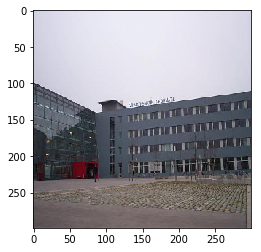

In [0]:
!pip install foolbox
import foolbox

preprocessing = (np.array([104, 116, 123]), 1)
fmodel = foolbox.models.KerasModel(model, bounds=(x.min(), x.max()), preprocessing=preprocessing)

FGSM_attack = foolbox.attacks.FGSM(fmodel)
FGSM_adversarial = FGSM_attack(x1,671)

# Check Results
print('Regular Image Prediction:')
print(decode_predictions(model.predict(x.copy()), top=3)[0])

print('Adversarial Image Prediction:')
print(decode_predictions(model.predict(preprocess_input(FGSM_adversarial[np.newaxis].copy())), top=3)[0])

plt.imshow(image.array_to_img(FGSM_adversarial))

# Patch

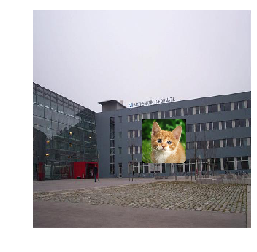

In [0]:
img_path = "tum.jpg"
img = image.load_img(img_path, target_size=(299, 299))
img2, label2 = foolbox.utils.imagenet_example()
img2 = image.array_to_img(img2).resize((60,60))
img.paste(img2,(150,150))
plt.axis('off')
plt.imshow(img)
#plt.savefig("test.png")


In [0]:
x1 = image.img_to_array(img)
x2 = np.expand_dims(x1, axis=0)
x_patch = preprocess_input(x2)
pred = model.predict(x_patch)
label = decode_predictions(pred)
label

[[('n02119022', 'red_fox', 0.5488919),
  ('n02123159', 'tiger_cat', 0.06134729),
  ('n02124075', 'Egyptian_cat', 0.048482608),
  ('n02123045', 'tabby', 0.0325553),
  ('n04589890', 'window_screen', 0.032278445)]]

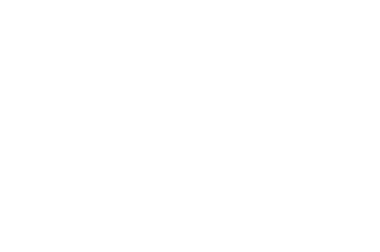

In [0]:
img_path = "tum.jpg"
img = image.load_img(img_path, target_size=(299, 299))
img_fool, label2 = foolbox.utils.imagenet_example()
img2 = np.zeros(shape=img_fool.shape)
img2 = image.array_to_img(img2).resize((60,60))
img.paste(img2,(60,60))
img2 = np.ones(shape=img_fool.shape)
img2 = image.array_to_img(img2).resize((60,60))
img.paste(img2,(200,60))
plt.axis('off')
#plt.imshow(img)
img.save('test.png')
#plt.savefig("test.png")

In [0]:
x1 = image.img_to_array(img)
x2 = np.expand_dims(x1, axis=0)
x_patch = preprocess_input(x2)
pred = model.predict(x_patch)
label = decode_predictions(pred)
label

[[('n04149813', 'scoreboard', 0.17004147),
  ('n06794110', 'street_sign', 0.16302939),
  ('n04005630', 'prison', 0.14068721),
  ('n06874185', 'traffic_light', 0.14065039),
  ('n02747177', 'ashcan', 0.041922107)]]

# Gradient

In [0]:
from keras import backend as K

# Get current session (assuming tf backend)
sess = K.get_session()
# Initialize adversarial example with input image
x_adv = x
# Added noise
x_noise = np.zeros_like(x)
# Set variables
epochs = 2
epsilon = 0.01
prev_probs = []
initial_class = np.argmax(pred)

for i in range(epochs): 
    # One hot encode the initial class
    target = K.one_hot(initial_class, 1000)
    
    # Get the loss and gradient of the loss wrt the inputs
    loss = K.categorical_crossentropy(target, model.output)
    grads = K.gradients(loss, model.input)

    # Get the sign of the gradient
    delta = K.sign(grads[0])
    x_noise = x_noise + delta

    # Perturb the image
    x_adv = x_adv + epsilon*delta

    # Get the new image and predictions
    x_adv = sess.run(x_adv, feed_dict={model.input:x})
    preds = model.predict(x_adv)

    # Store the probability of the target class
    prev_probs.append(preds[0][initial_class])

    if i%2==0:
        print(i, preds[0][initial_class], decode_predictions(preds, top=3)[0])

W0727 15:04:05.540173 139622928848768 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


0 1.3948353e-06 [('n04005630', 'prison', 0.9986338), ('n03661043', 'library', 0.00044394683), ('n03877845', 'palace', 0.00022565205)]


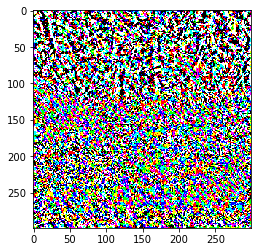

In [0]:
diff = x-x_adv
plt.imshow(image.array_to_img(diff[0]))
image.array_to_img(diff[0]).save('diff.png')


In [0]:
# Set variables
epochs = 20
epsilon = 0.01
target_class = 624 #library
prev_probs = []

for i in range(epochs): 
    # One hot encode the target class
    target = K.one_hot(target_class, 1000)
    
    # Get the loss and gradient of the loss wrt the inputs
    loss = -1*K.categorical_crossentropy(target, model.output)
    grads = K.gradients(loss, model.input)

    # Get the sign of the gradient
    delta = K.sign(grads[0])
    x_noise = x_noise + delta

    # Perturb the image
    x_adv = x_adv + epsilon*delta

    # Get the new image and predictions
    x_adv = sess.run(x_adv, feed_dict={model.input:x})
    preds = model.predict(x_adv)

    # Store the probability of the target class
    prev_probs.append(preds[0][target_class])

    if i%1==0:
      print(i, preds[0][target_class], decode_predictions(preds, top=3)[0])
    if preds[0][target_class] > 0.5:
      break



0 0.009693637 [('n04005630', 'prison', 0.98945785), ('n03661043', 'library', 0.009693637), ('n03877845', 'palace', 0.00024355996)]
1 0.88916993 [('n03661043', 'library', 0.88916993), ('n04005630', 'prison', 0.106657706), ('n03877845', 'palace', 0.0010489454)]


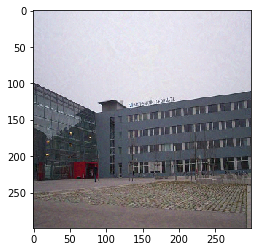

In [0]:
plt.imshow(image.array_to_img(x_adv[0]))
